In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('fcc-forum-pageviews.csv', parse_dates=['date'], index_col=['date'])
df

,value
date,
2016-05-09,1201
2016-05-10,2329
2016-05-11,1716
2016-05-12,10539
2016-05-13,6933
...,...
2019-11-29,171584
2019-11-30,141161
2019-12-01,142918


In [5]:
mask_views = (df['value'] >= df['value'].quantile(0.025)) & (df['value'] <= df['value'].quantile(0.975))
df = df[mask_views]
df

,value
date,
2016-06-17,21691
2016-06-18,21681
2016-06-20,28508
2016-06-21,26805
2016-06-25,21923
...,...
2019-11-03,130118
2019-11-09,115642
2019-11-10,117717


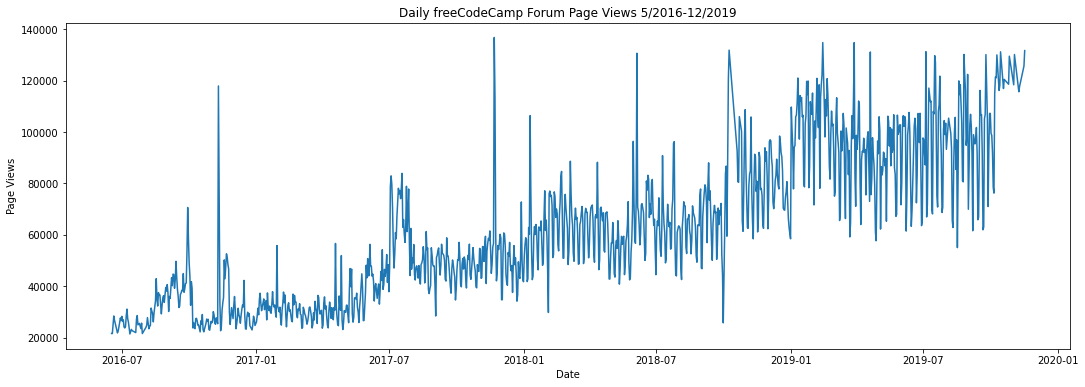

In [6]:
plt.figure(figsize = (18,6))
plt.plot(df.index, df['value'])
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
plt.show()



In [7]:
df_bar = df.reset_index()
df_bar['day'] = df_bar['date'].dt.day
df_bar['month'] = df_bar['date'].dt.month
df_bar['year'] = df_bar['date'].dt.year
df_bar = df_bar[['date','year', 'month', 'value']]
df_bar = df_bar.set_index('date')
df_bar

,year,month,value
date,,,
2016-06-17,2016,6,21691
2016-06-18,2016,6,21681
2016-06-20,2016,6,28508
2016-06-21,2016,6,26805
2016-06-25,2016,6,21923
...,...,...,...
2019-11-03,2019,11,130118
2019-11-09,2019,11,115642
2019-11-10,2019,11,117717


<AxesSubplot:xlabel='year', ylabel='value'>

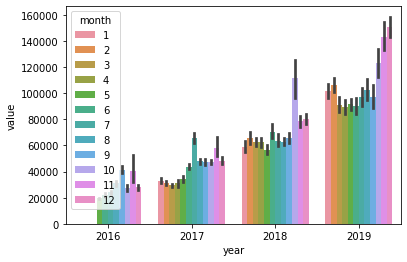

In [7]:
sns.barplot(data=df_bar, y='value', x='year', hue='month')

In [8]:
df_bar_pivot = df_bar.pivot_table(index= 'year', columns= 'month', values= 'value', aggfunc= np.mean)
df_bar_pivot


month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,24666.777778,25460.761905,32154.750000,41476.866667,28168.250000,36354.241379,28690.928571
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,84908.777778,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,97710.461538,92747.714286,111169.705882,123182.833333,NaN


In [9]:
column_names = ['January', 'February', 'March', 'April',
            'May', 'June', 'July', 'August', 'September', 
            'October', 'November', 'December']
df_bar_pivot.columns = column_names
df_bar_pivot

,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
2016,NaN,NaN,NaN,NaN,NaN,24666.777778,25460.761905,32154.750000,41476.866667,28168.250000,36354.241379,28690.928571
2017,32785.161290,31113.071429,29369.096774,30878.733333,34244.290323,43577.500000,65806.838710,47712.451613,47376.800000,47438.709677,57701.566667,48420.580645
2018,58580.096774,65679.000000,62693.774194,62350.833333,56562.870968,70117.000000,63591.064516,62831.612903,65941.733333,84908.777778,78688.333333,80047.483871
2019,102056.516129,105968.357143,91214.483871,89368.433333,91439.903226,90435.642857,97236.566667,97710.461538,92747.714286,111169.705882,123182.833333,NaN


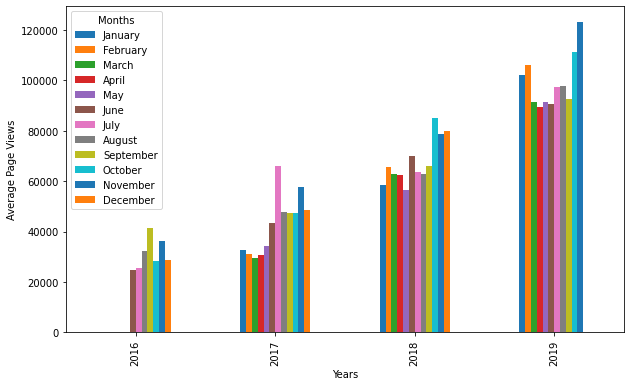

In [20]:
df_bar_pivot.plot(kind = 'bar', figsize = (10, 6))
plt.ylabel("Average Page Views")
plt.xlabel("Years")
plt.legend(title = "Months")

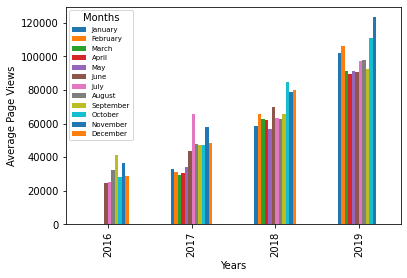

In [18]:

df_bar_pivot.plot.bar()
plt.ylabel("Average Page Views")
plt.xlabel("Years")
plt.legend(title = "Months", prop={'size': 7})
fig = plt.show()

In [19]:
fig = plt.figure(figsize=(10,6))


<Figure size 720x432 with 0 Axes>

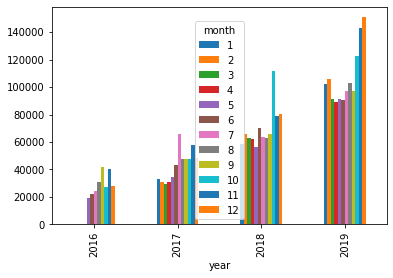

In [21]:
fog = df_bar_pivot.plot.bar()

Text(0.5, 0, 'animal')

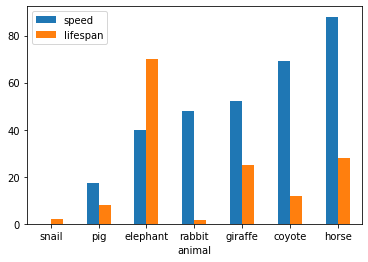

In [28]:
speed = [0.1, 17.5, 40, 48, 52, 69, 88]
lifespan = [2, 8, 70, 1.5, 25, 12, 28]
index = ['snail', 'pig', 'elephant',
         'rabbit', 'giraffe', 'coyote', 'horse']
df = pd.DataFrame({'speed': speed,
                   'lifespan': lifespan}, index=index)
ax = df.plot.bar(rot=0)
plt.xlabel('animal')

In [29]:
ax

<AxesSubplot:xlabel='animal'>

In [5]:
df_box = df.copy()
df_box.reset_index(inplace=True)
df_box['year'] = [d.year for d in df_box.date]
df_box['month'] = [d.strftime('%b') for d in df_box.date]
df_box

,date,value,year,month
0,2016-05-19,19736,2016,May
1,2016-05-26,18060,2016,May
2,2016-05-27,19997,2016,May
3,2016-05-28,19044,2016,May
4,2016-05-29,20325,2016,May
...,...,...,...,...
1233,2019-11-24,138875,2019,Nov
1234,2019-11-29,171584,2019,Nov
1235,2019-11-30,141161,2019,Nov
1236,2019-12-01,142918,2019,Dec


<AxesSubplot:xlabel='year', ylabel='value'>

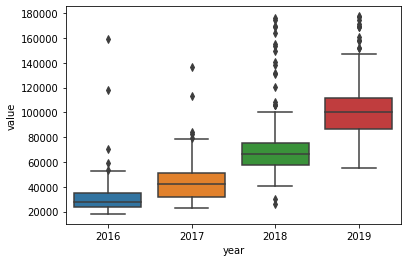

In [9]:
sns.boxplot(data = df_box, x = 'year', y = 'value')

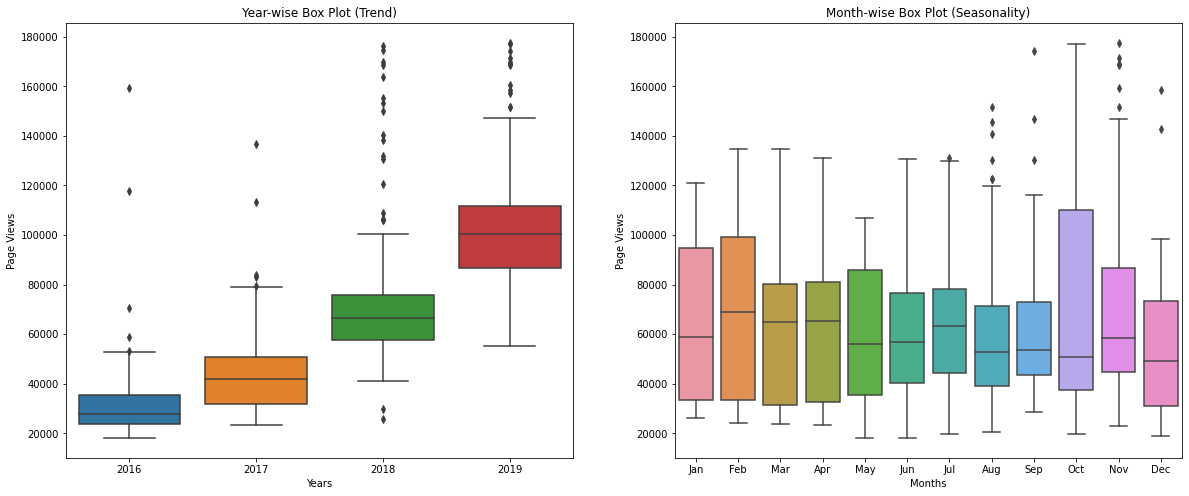

In [26]:
column_names = ['Jan', 'Feb', 'Mar', 'Apr',
            'May', 'Jun', 'Jul', 'Aug', 'Sep', 
            'Oct', 'Nov', 'Dec']

fig, axes = plt.subplots(1, 2, figsize=(20, 8))
sns.boxplot(data = df_box, ax = axes[0], x = 'year', y = 'value').set(xlabel = 'Years', ylabel = 'Page Views', title=  "Year-wise Box Plot (Trend)")
sns.boxplot(data = df_box, ax = axes[1], x = 'month', y = 'value', order = column_names).set(xlabel = 'Months', ylabel = 'Page Views', title=   "Month-wise Box Plot (Seasonality)")
plt.show()